<a href="https://colab.research.google.com/github/Sniperpilot16/DSPS_MRichardson/blob/master/HW12/KerasTensorflowlab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf

In [0]:
from tensorflow import keras
from keras import optimizers
import pylab as pl
import numpy as np
np.random.seed(123)

# Task 1: Getting the data: standard handwritten digit recognition task

In [0]:
(train_input, train_labels), (test_input, test_labels) = keras.datasets.mnist.load_data()

# Task 2: Understand the Input Data

In [0]:
train_input

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [0]:
train_input.shape

(60000, 28, 28)

In [0]:
train_labels.shape

(60000,)

In [0]:
train_labels[9]

4

In [0]:
train_input1 = train_input[1]
train_input[1].shape

(28, 28)

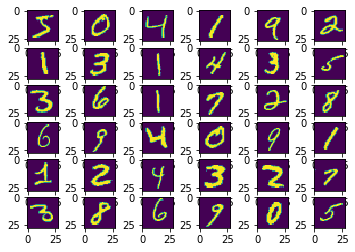

In [0]:
imax = 6
for i in range(imax):
  for j in range(imax):
    pl.subplot(imax, imax, i*imax+j+1)
    pl.imshow(train_input[i*imax+j])

**Figure 1**: subsequent plots of the train_input.

# Task 5

In [0]:
model = keras.Sequential([keras.layers.Flatten(input_shape=(28, 28)),
                         keras.layers.Dense(128, activation=tf.nn.sigmoid), 
                          keras.layers.Dense(10,activation=tf.nn.softmax) ])

# Task 6

In [0]:
model.compile?


In [0]:
model.compile(optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.01),
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [0]:
model.fit(train_input, train_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 60us/sample - loss: 0.6544 - acc: 0.8330
Epoch 2/5
60000/60000 [==============================] - 4s 59us/sample - loss: 0.3630 - acc: 0.9043
Epoch 3/5
60000/60000 [==============================] - 4s 59us/sample - loss: 0.3153 - acc: 0.9135
Epoch 4/5
60000/60000 [==============================] - 4s 58us/sample - loss: 0.2896 - acc: 0.9200
Epoch 5/5
60000/60000 [==============================] - 4s 59us/sample - loss: 0.2715 - acc: 0.9232


# Task 7

In [0]:
test_loss, test_acc = model.evaluate(test_input, test_labels)

10000/10000 [==============================] - 0s 37us/sample - loss: 0.2541 - acc: 0.9287


# Task 8

In [0]:
pred = model.predict(test_input, verbose = 1)


10000/10000 [==============================] - 0s 32us/sample


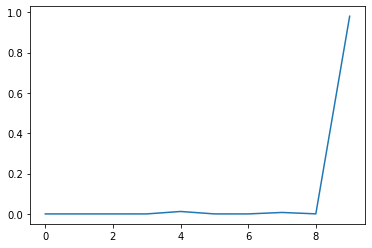

In [0]:
pl.plot(pred[9])

**Figure 2**: Plot of the prediction of where the test_input is most likely. 

<span style="color:red">**-2 pts: missing the observation of 10th of test and its label**</span>

# Task 9

In [0]:
for i, pre in enumerate(pred):
    if np.argmax(pre) != test_labels[i]:
        print(i)
        firstfail = i
        break

8


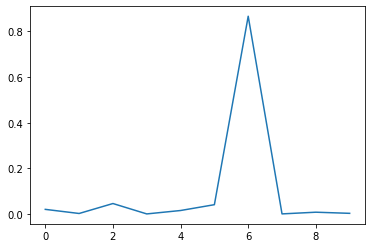

In [0]:
pl.plot(pred[firstfail])

**Figure 3**: Plot depicting the location of the first failed prediction. 

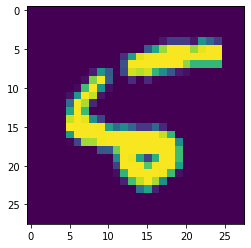

In [0]:
pl.imshow(test_input[firstfail])

**Figure 4**: Image of the first failed prediction. Considering that this is supposed to be a 5 or 6, this is an accurate depiction of the first failed prediction. 

In [0]:
test_labels[firstfail]

5

# Task 10

In [0]:
model10 = keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                         keras.layers.Dense(128, activation=tf.nn.sigmoid),
                         keras.layers.Dense(128, activation=tf.nn.sigmoid),
                         keras.layers.Dense(128, activation=tf.nn.sigmoid),
                         keras.layers.Dense(128, activation=tf.nn.sigmoid),
                         keras.layers.Dense(10,activation=tf.nn.softmax)])

In [0]:
model10.compile(optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.01),
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model10.fit(train_input, train_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 73us/sample - loss: 2.2991 - acc: 0.1228
Epoch 2/5
60000/60000 [==============================] - 4s 72us/sample - loss: 2.2721 - acc: 0.1819
Epoch 3/5
60000/60000 [==============================] - 4s 72us/sample - loss: 2.1830 - acc: 0.3250
Epoch 4/5
60000/60000 [==============================] - 4s 72us/sample - loss: 1.7562 - acc: 0.4457
Epoch 5/5
60000/60000 [==============================] - 4s 72us/sample - loss: 1.2844 - acc: 0.5928


In [0]:
test_loss10, test_acc10 = model10.evaluate(test_input, test_labels)

10000/10000 [==============================] - 0s 38us/sample - loss: 1.1141 - acc: 0.6654


In [0]:
pred10 = model10.predict(test_input, verbose=1)

10000/10000 [==============================] - 0s 35us/sample


In [0]:
for i, pre in enumerate(pred10):
    if np.argmax(pre) != test_labels[i]:
        print(i)
        firstfail = i
        break

0


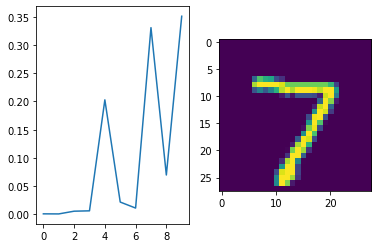

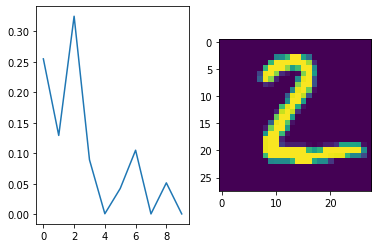

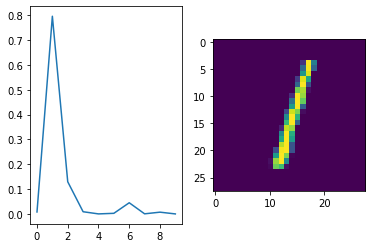

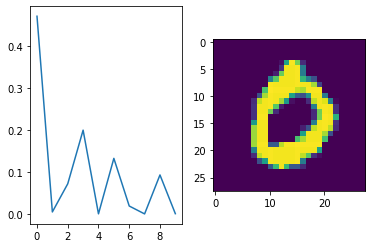

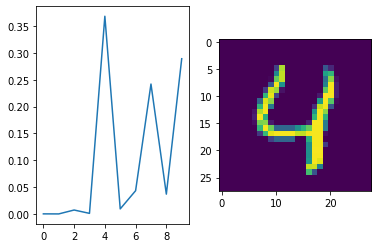

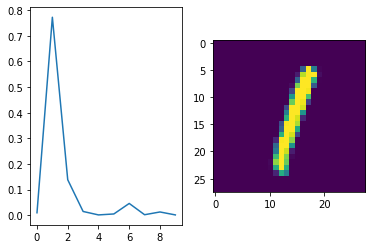

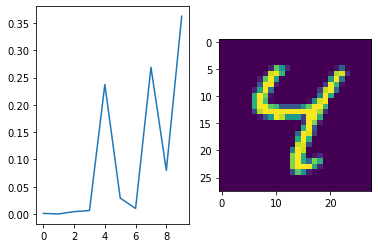

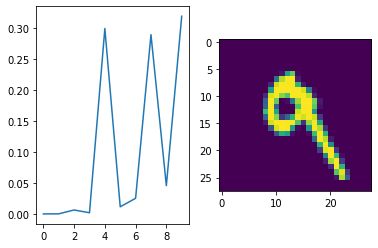

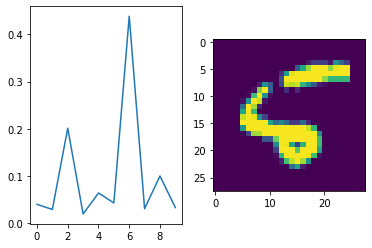

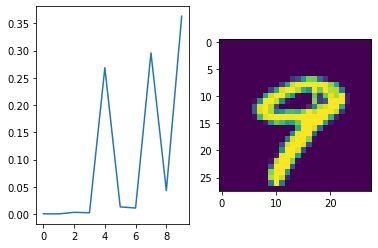

In [0]:
for i in range(10):
    pl.subplot(121)
    pl.plot(pred10[i])
    pl.subplot(122)
    pl.imshow(test_input[i])
    pl.show()

**Figure 5**: Plots of the images within test_input. 

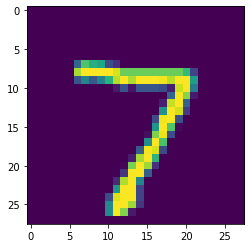

In [0]:
pl.imshow(test_input[firstfail])

**Figure 6**: Image of the first failed prediction with the updated parameters. Since this is clearly a 7, the parameters set may be too accurate causing there to be outliers when outliers are not present. 